In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Gauss n=1: I = I + w0*f((a-b)/2*csi0 + (b+a)/2)*(b-a)/2 + w1*f((a-b)/2*csi1 + (b+a)/2)*(b-a)/2
Cuad Met Coef Nedet:
                     A[i] = x**i
                     c[i] = (b**(i+1) - a**(i+1))/(i+1)
                     W = A*c
                     In = In + W[k]*f(x[k])
Aproximare L2:
              B[k] = sp.integrate(w(x)*f(x)*x**k, (x, a, b)).evalf()
              M[k, j] = sp.integrate(w(x)*x**(k+j), (x, a, b)). evalf()
              c = np.linalg.solve(M, B)
              pn = pn + c[i] * x**i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def SplineL(f, a, b, n, x):
  X = np.linspace(a, b, n+1)
  Y = f(X)
  A = np.zeros(n)
  B = np.zeros(n)
  S = np.zeros_like(x)
  for i in range(len(x)):
    for j in range(n+1):
      if x[i] >= X[j] and x[i] <= X[j+1]:
        A[j] = Y[j]
        B[j] = (Y[j+1] - Y[j])/(X[j+1] - X[j])
        S[j] = A[j] + B[j]*(x[i] - X[j])
        break
  return S

def mCoefNedet(f, a, b, n):
  x = np.linspace(a, b, n+1)
  A = np.zeros((n+1, n+1))
  c = np.zeros(n+1)
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = x[j]**i
      c[i] = (b**(i+1) - a**(i+1))/(i+1)
  W = np.linalg.solve(A, c)
  In = 0
  for k in range(n+1):
    In = In + W[k]*f(x[k])
  return In    # integrala exacta

def Gaussn1(f, a, b):
  x = sp.Symbol('x')
  x0 = sp.Symbol('x0')
  x1 = sp.Symbol('x1')
  W0 = sp.Symbol('W0')
  W1 = sp.Symbol('W1')
  sol = sp.solve([W0 + W1 - sp.integrate(1, (x, a, b)),
                  W0*x0 + W1*x1 - sp.integrate(x, (x, a, b)),
                  W0*x0**2 + W1*x1**2 - sp.integrate(x**2, (x, a, b)),
                  W0*x0**3 + W1*x1**3 - sp.integrate(x**3, (x, a, b))],
                 [W0, W1, x0, x1])
  print(sol)
  w0 = sol[0, 0]
  w1 = sol[0, 1]
  csi0 = sol[0, 2]
  csi1 = sol[0, 3]
  I = w0 * f((b-a)/2 * csi0 + (b+a)/2)*(b-a)/2 + w1 * f((b-a)/2 * csi1 + (b+a)/2)*(b-a)/2
  return I

def AproximareL2(f, w, a, b, n):
  x = sp.Symbol('x')
  B = np.zeros(n+1)
  M = np.zeros((n+1, n+1))
  for k in range(n+1):
    B[k] = w(x)*f(x)*x**k
    for j in range(n+1):
      M[k, j] = w(x)*x**(k+j)
  C = sp.solve(M, B)
  pn = 0
  for i in range(n+1):
    pn = pn + C[i] * x**i

def Cuadraturi(f, a, b, n):
  if n == 0:
    I = f((b+a)/2)*(b-a)
  if n == 1:
    I = (f(a)+f(b))*(b-a)/2
  if n == 2:
    I = (f(a) + 4*f((a+b)/2) + f(b))*(b-a)/6
  if n == 3:
    I = (f(a) + 3*f((2*a+b)/3) + 3*f((a+2*b)/3) + f(b))*(b-a)/8
  return I

def CuadraturiSumate(f, a, b, n, m):
  x = np.linspace(a, b, m)
  I = 0
  for k in range(m):
    I = I + Cuadraturi(f, x[k], x[k+1], n)
  return I

def FDM(f, df, x, h):
  aproximari = np.zeros(3)
  erori = np.zeros(3)
  aproximari[0] = (f(x+h) - f(x))/h
  erori[0] = np.abs(aproximari[0] - df(x))
  aproximari[1] = (f(x) - f(x-h))/h
  erori[1] = np.abs(aproximari[1] - df(x))
  aproximari[2] = (f(x+h) - f(x-h))/(2*h)
  erori[2] = np.abs(aproximari[2] - df(x))
  return aproximari, erori


In [ ]:
## functii test 2 analiza numerica

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# pentru scrierea in format stiintific folosim :.nre
# pentru scrierea in format stiintific folosim :.nrf


def splineliniar(f, a, b, n, x):
  A = np.zeros(n)   #coef liber in polinom
  B = np.zeros(n)   #coef lui x
  X = np.linspace(a, b, n+1)
  Y = f(X)
  Sn = np.zeros_like(x)
  for i in range(len(x)):
    for j in range(n):
      if x[i]>=X[j] and x[i]<=X[j+1]:
        A[j] = Y[j]
        B[j] = (Y[j+1] - Y[j])/(X[j+1] - X[j])
        Sn = A[j] + B[j]*(x[i] - X[j])
        break
  return Sn

def FDM(f, df, x, h):
  aproximare = np.zeros(3)
  eroare = np.zeros(3)
  aproximare[0] = (f(x+h) - f(x))/h         #diferente finite ascendente
  aproximare[1] = (f(x) - f(x-h))/h         #diferente finite descendente
  aproximare[2] = (f(x+h) - f(x-h))/(2*h)   #diferente finite centrale
  eroare[0] = np.abs(aproximare[0] - df(x))
  eroare[1] = np.abs(aproximare[1] - df(x))
  eroare[2] = np.abs(aproximare[2] - df(x))
  return aproximare, eroare

# plt.yscale('log')

def Cuadraturi(f, a, b, n):
  if n==0:
    I = f((a+b)/2)*(b-a)     #aria dreptunghiului
  if n==1:
    I = (f(a)+f(b))*(b-a)/2  #aria trapezului
  if n==2:
    I = (f(a)+4*f((a+b)/2)+f(b))*(b-a)/6   #aria Simpson
  if n==3:
    I = (f(a)+3*f((2*a+b)/3)+3*f((a+2*b)/3)+f(b))*(b-a)/8  #aria Newton
  return I

def CuadraturiSumate(f, a, b, n, m):
  x = np.linspace(a, b, m+1)
  I = 0
  for k in range(m):
    I = I + Cuadraturi(f, x[k], x[k+1], n)
  return I

def CmetCN(f, a, b, n):    #metoda coeficientilor nedeterminati
  x = np.linspace(a, b, n+1)
  A = np.zeros((n+1, n+1))
  c = np.zeros_like(x)
  for i in range(len(x)):
    for j in range(len(x)):
      A[i, j] = x[j]**i
      c[i] = (b**(i+1)-a**(i+1))/(i+1)
  W = np.linalg.solve(A, c)
  In = 0
  for k in range(len(x)):
    In = In + W[k]*f(x[k])
  return In

def Gauss1(f, a, b):
  x0 = sp.Symbol('x0', negative = True)
  x1 = sp.Symbol('x1', positive = True)
  W0 = sp.Symbol('W0')
  W1 = sp.Symbol('W1')
  x = sp.Symbol('x')
  sol = sp.solve([W0 + W1 - sp.integrate(1, (x, -1, 1)),
                  W0*x0 + W1*x1 - sp.integrate(x, (x, -1, 1)),
                  W0*x0**2 + W1*x1**2 - sp.integrate(x**2, (x, -1, 1)),
                  W0*x0**3 + W1*x1**3 - sp.integrate(x**3, (x, -1, 1))],
                 [W0, W1, x0, x1])
  print(sol)
  w0 = sol[0, 0]
  w1 = sol[0, 1]
  csi0 = sol[0, 2]
  csi1 = sol[0, 3]
  I = w0 * f((b-a)/2 *csi0 + (b+a)/2)*(b-a)/2 + w1 * f((b-a)/2 *csi1 + (b+a)/2)*(b-a)/2
  return I

def AproxL2(f, a, b, w, n):
  B = np.zeros(n+1)
  M = np.zeros((n+1, n+1))
  x = sp.Symbol('x')
  for k in range(n+1):
    B[k] = sp.integrate(w(x)*f(x)*x**k, (x, a, b)).evalf()
    for j in range(n+1):
      M[k, j] = sp.integrate(w(x)*x**(k+j), (x, a, b)).evalf()
  C = np.linalg.solve(M, B)
  pn = 0
  for i in range(n+1):
    pn = pn + C[i] * x**i
  return pn

In [ ]:
# cuadraturi prin metoda coeficientilor nedeterminati

import numpy as np
import sympy as sp

def CuadMetCN(f, a, b, n):
  x = np.linspace(a, b, n+1)
  A = np.zeros((n+1, n+1))
  c = np.zeros(n+1)
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = x[j]**i
      c[i] = (b**(i+1) - a**(i+1))/(i+1)
  W = np.linalg.solve(A, c)
  In = 0
  for k in range(n+1):
    In = In + W[k]*f(x[k])
  return In

def mGauss1(f, a, b):
  x = sp.Symbol('x')
  x0 = sp.Symbol('x0', negative = True)
  x1 = sp.Symbol('x1', positive = True)
  W0 = sp.Symbol('W0')
  W1 = sp.Symbol('W1')
  sol = sp.solve([W0 + W1 - sp.integrate(1, (x, a, b)),
                  W0*x0 + W1*x1 - sp.integrate(x, (x, a, b)),
                  W0*x0**2 + W1*x**2 - sp.integrate(x**2, (x, a, b)),
                  W0*x0**3 + W1*x1**3 - sp.integrate(x**3, (x, a, b))],
                 [W0, W1, x0, x1])
  w0 = sol[0, 0]
  w1 = sol[0, 1]
  csi0 = sol[0, 2]
  csi1 = sol[0, 3]
  I = w0 * f((b-a)/2 * csi0 + (b+a)/2)*(b-a)/2 + w1 * f((b-a)/2 * csi1 + (b+a)/2)*(b-a)/2
  return I

def AproxL_2(f, a, b, w, n):
  x = sp.Symbol('x')
  B = np.zeros(n+1)
  M = np.zeros((n+1, n+1))
  for k in range(n+1):
    B[k] = sp.integrate(w(x) * f(x) * x**k, (x, a, b)).evalf()
    for j in range(n+1):
      M[j, k] = sp.integrate(w(x) * x**(k+j), (x, a, b)).evalf()
  C = np.linalg.solve(M, B)
  pn = 0
  for i in range(n+1):
    pn = pn + C[i] * x**i



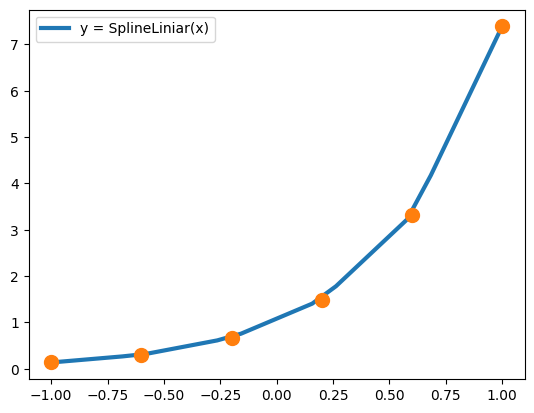

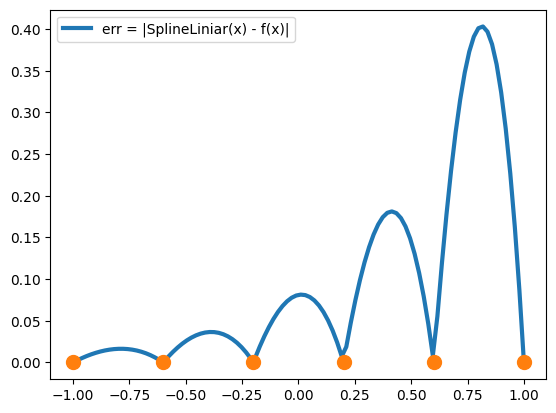

In [ ]:
# Spline -----------------------------------> exercitiul meu
import numpy as np
import matplotlib.pyplot as plt

def SplineLIniar(f, a, b, n, x):
  A = np.zeros(n)
  B = np.zeros(n)
  X = np.linspace(a, b, n+1)
  Y = f(X)
  y = np.zeros_like(x)
  for i in range(len(x)):
    for j in range(n):
      if x[i] >= X[j] and x[i] <= X[j+1]:
        A[j] = Y[j]
        B[j] = (Y[j+1] - Y[j]) / (X[j+1] - X[j])
        y[i] = A[j] + B[j]*(x[i] - X[j])
        break
  return y

sol_SL = SplineLIniar(f, a, b, n, x)
#print(sol_SL)

f = lambda x: np.exp(2*x)
a, b = -1, 1
n = 5
X = np.linspace(a, b, n+1)
Y = f(X)
x_graf = np.linspace(a, b, 20)
sol_graf = SplineLIniar(f, -1, 1, 5, x_graf)

fig = plt.figure()
ax = plt.axes()
ax.plot(x_graf, sol_graf, linestyle = '-', lw = 3, label = 'y = SplineLiniar(x)')
ax.plot(X, Y, linestyle='None', marker = 'o', markersize = 10)
ax.legend(loc = 'best')
plt.show()

fig2 = plt.figure()
ax2 = plt.axes()
x_graf = np.linspace(a, b, 100)
sol_graf = SplineLIniar(f, -1, 1, 5, x_graf)
ax2.plot(x_graf, np.abs(sol_graf - f(x_graf)), linestyle = '-', lw = 3, label = 'err = |SplineLiniar(x) - f(x)|')
ax2.plot(X, np.zeros_like(X), linestyle='None', marker = 'o', markersize = 10)
ax2.legend(loc = 'best')
plt.show()



 Pentru h = 10^-1: 

--------------------------------------------------------------------
|Aproximare diferente finite ascendente | 2.21| eroarea| 2.1403e-01|
|Aproximare diferente finite descendente| 1.81| eroarea| 1.8731e-01|
|Aproximare diferente finite centrale   | 2.01| eroarea| 1.3360e-02|
--------------------------------------------------------------------

 Pentru h = 10^-2: 

--------------------------------------------------------------------
|Aproximare diferente finite ascendente | 2.02| eroarea| 2.0134e-02|
|Aproximare diferente finite descendente| 1.98| eroarea| 1.9867e-02|
|Aproximare diferente finite centrale   | 2.00| eroarea| 1.3334e-04|
--------------------------------------------------------------------

 Pentru h = 10^-3: 

--------------------------------------------------------------------
|Aproximare diferente finite ascendente | 2.00| eroarea| 2.0013e-03|
|Aproximare diferente finite descendente| 2.00| eroarea| 1.9987e-03|
|Aproximare diferente finite centrale

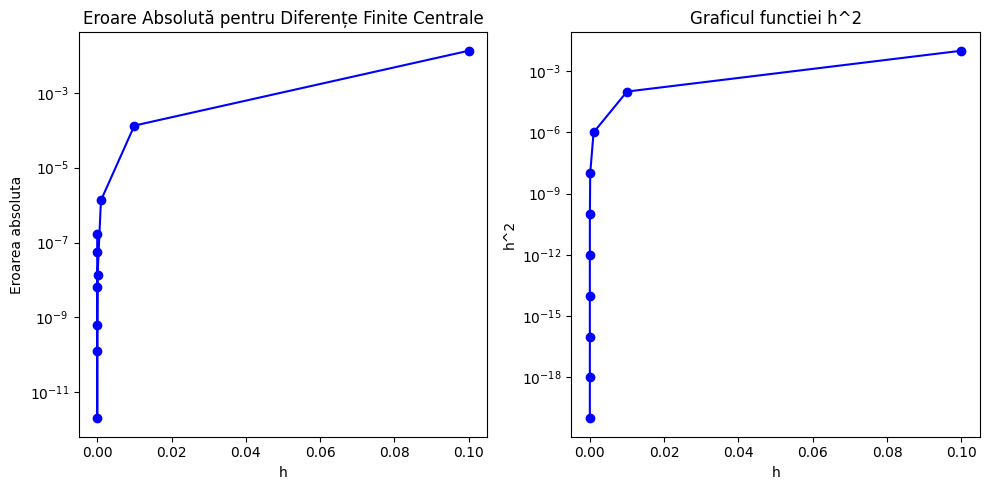

In [ ]:
# Derivarea FDM ------------------------------> exercitiul meu

import matplotlib.pyplot as plt
import numpy as np

def FDM(f, df, x, h):
  approx = np.zeros(3)                    # aproximari
  err = np.zeros(3)                       # eroarea
  approx[0] = (f(x+h) - f(x)) / h         # diferente finite ascendente
  err[0] = np.abs(approx[0] - df(x))
  approx[1] = (f(x) - f(x-h)) / h         # diferente finite descendente
  err[1] = np.abs(approx[1] - df(x))
  approx[2] = (f(x+h) - f(x-h)) / (2*h)   # diferente finite centrale
  err[2] = np.abs(approx[2] - df(x))
  return approx, err

f = lambda x: np.exp(2*x)
df = lambda x: 2*np.exp(2*x)
x_graf = 0
val_h = []
val_h2 = []
err_graf = []
# Valorile pentru h = 10^-k, k = 1 până la 10
for k in range(1, 11):
  h = 10**(-k)
  h_2 = h**2
  val_h.append(h)
  val_h2.append(h_2)
  Approx, err = FDM(f, df, x_graf, h)
  err_graf.append(err)
  print('\n', f"Pentru h = 10^-{k}:", '\n')
  print('--------------------------------------------------------------------')
  print(f"|Aproximare diferente finite ascendente | {Approx[0]:.2f}| eroarea| {err[0]:.4e}|")
  print(f"|Aproximare diferente finite descendente| {Approx[1]:.2f}| eroarea| {err[1]:.4e}|")
  print(f"|Aproximare diferente finite centrale   | {Approx[2]:.2f}| eroarea| {err[2]:.4e}|")
  print('--------------------------------------------------------------------')

# Graficul erorilor absolute și al funcției h^2

fig = plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.plot(val_h, np.array(err_graf)[:, 2], marker = 'o', color = 'b')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Eroarea absoluta')
plt.title('Eroare Absolută pentru Diferențe Finite Centrale')

plt.subplot(1, 2, 2)
plt.plot(val_h, val_h2, marker = 'o', color = 'b')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('h^2')
plt.title('Graficul functiei h^2')

plt.tight_layout()
plt.show()


Aria dreptunghiului:_0.7788 | Aria dreptunghiului sumata:_0.7481
Aria trapez:_________0.6839 | Aria trapez sumata:_________0.7444
Aria Simpson:________0.3506 | Aria Simpson sumata:________0.3952
Aria Newton:_________0.3630 | Aria Newton sumata:_________0.3730


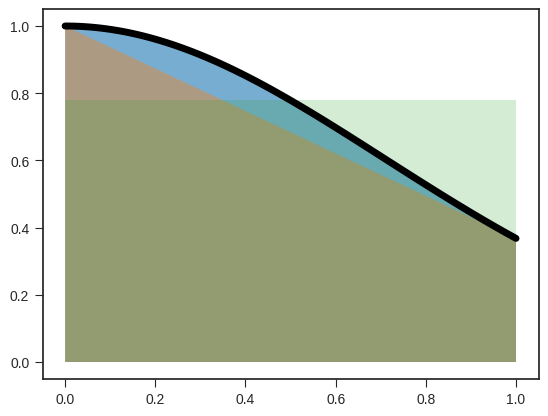

In [ ]:
### Metoda trapezului, Simpson, Newton -------------------------> exercitiul meu

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate as integrate

def Cuadraturi(f, a, b, n):
  if n==0:
    I = f((a+b)/2)*(b-a)  #cuadratura dreptunghiului
  if n==1:
    I = (f(a)+f(b))*(b-a)/2   #cuadratura trapezului
  if n==2:
    I = (f(a)+4*(f(a+b)/2)+f(b))*(b-a)/6  #cuatratura Simpson
  if n==3:
    I = (f(a)+f((2*a+b)/3)+f((a+2*b)/3)+f(b))*(b-a)/8   #cuadratura Newton
  return I

def CuadraturaSum(f, a, b, n, m):
  x = np.linspace(a, b, m+1)
  I = 0
  for k in range(m):
    I = I + Cuadraturi(f, x[k], x[k+1], n)
  return I

f = lambda x: np.exp(-x**2)
a = 0
b = 1

A_dreptunghi = Cuadraturi(f, a, b, 0)
A_dreptunghiSum = CuadraturaSum(f, a, b, 0, 5)
print(f'Aria dreptunghiului:_{A_dreptunghi:.4f} | Aria dreptunghiului sumata:_{A_dreptunghiSum:.4f}')
A_trapez = Cuadraturi(f, a, b, 1)
A_trapezSum = CuadraturaSum(f, a, b, 1, 5)
print(f'Aria trapez:_________{A_trapez:.4f} | Aria trapez sumata:_________{A_trapezSum:.4f}')
A_Simpson = Cuadraturi(f, a, b, 2)
A_SimpsonSum = CuadraturaSum(f, a, b, 2, 5)
print(f'Aria Simpson:________{A_Simpson:.4f} | Aria Simpson sumata:________{A_SimpsonSum:.4f}')
A_Newton = Cuadraturi(f, a, b, 3)
A_NewtonSum = CuadraturaSum(f, a, b, 3, 5)
print(f'Aria Newton:_________{A_Newton:.4f} | Aria Newton sumata:_________{A_NewtonSum:.4f}')

fig = plt.figure()
ax = plt.axes()
x = np.linspace(a, b, 100)
plt.legend()
ax.plot(x, f(x), color = 'k', lw = 5, label = 'f(x)')
ax.fill_between(x, f(x), alpha = 0.6, label = 'Aria f(x)')
ax.fill_between([a, b], [f(a), f(b)], alpha = 0.4, label = 'Aria trapezului')
ax.fill_between([a, b], [f((a+b)/2)*(b-a), f((a+b)/2)*(b-a) ], alpha = 0.2, label = 'Aria dreptunghiului')

plt.show()


In [ ]:
# Metoda coeficientilor nedeterminati + Metoda Gauss n=1 -------------------------> exercitiul meu

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def CuadMetCoefNedet(f, a, b, n):
  x = np.linspace(a, b, n+1)
  A = np.zeros((n+1, n+1))
  c = np.zeros_like(x)
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = x[j]**i
      c[i] = (b**(i+1) - a**(i+1)) / (i+1)
  W = np.linalg.solve(A, c)
  In = 0
  for k in range(n+1):
    In = In + W[k]*f(x[k])
  return In    #integrala exacta


def CuadGauss1(f, a, b, n=1):
  x0 = sp.Symbol('x0', negative = True)
  x1 = sp.Symbol('x1', positive = True)
  W0 = sp.Symbol('W0')
  W1 = sp.Symbol('W1')
  x = sp.Symbol('x')
  sol = sp.solve([W0 + W1 - sp.integrate(1, (x, -1, 1)),
                  W0*x0 + W1*x1 - sp.integrate(x, (x, -1, 1)),
                  W0*x0**2 + W1*x1**2 - sp.integrate(x**2, (x, -1, 1)),
                  W0*x0**3 + W1*x1**3 - sp.integrate(x**3, (x, -1, 1))],
                 [W0, W1, x0, x1])
  print(f"[w0, w1, csi0, cs1] : {sol}")
  w0 = sol[0][0]
  w1 = sol[0][1]
  csi0 = sol[0][2]
  csi1 = sol[0][3]
  I = w0*f((b-a)/2 * csi0 + (b+a)/2)*(b-a)/2 + w1*f((b-a)/2 * csi1 + (b+a)/2)*(b-a)/2
  return I

a, b = 0, 1
f = lambda x: sp.exp(-x**2)
n = 1
In_sol = CuadMetCoefNedet(f, a, b, n)
print(f"Metoda coeficientilor nedeterminati: {In_sol:.4f}")
I_sol = CuadGauss1(f, a, b, n=1)
print(f"Metoda Gauss cu n=1: {I_sol:.4f}")


Metoda coeficientilor nedeterminati: 0.6839
[w0, w1, csi0, cs1] : [(1, 1, -sqrt(3)/3, sqrt(3)/3)]
Metoda Gauss cu n=1: 0.7466


Pn: 0.999999999999999*x**2 - 2.0*x + 3.0


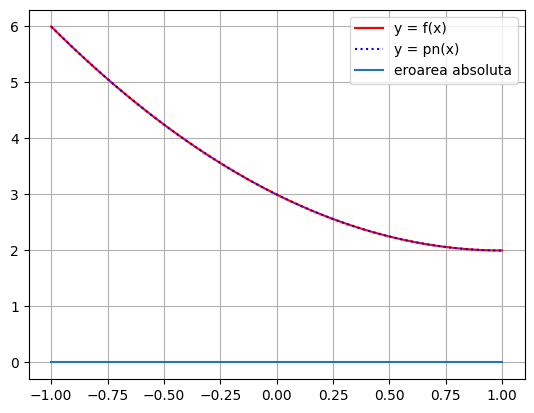

In [ ]:
# metoda celor mai mici patrate -------------------------> exercitiul meu

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def AproximareL2(f, a, b, w, n):   # w(x) este functia de pondere
  B = np.zeros(n+1)
  M = np.zeros((n+1, n+1))
  x = sp.Symbol('x')
  for k in range(n+1):
    B[k] = sp.integrate(w(x) * f(x) * x**k, (x, a, b)).evalf()
    for j in range(n+1):
      M[k, j] = sp.integrate(w(x) * x**(k+j), (x, a, b)).evalf()
  C = np.linalg.solve(M, B)
  pn = 0
  for i in range(n+1):
    pn = pn + C[i] * x**i
  return pn

f = lambda x: x**2 - 2*x + 3
a, b = -1, 1
n = 2
w = lambda x: 1

pn = AproximareL2(f, a, b, w, n)
print(f"Pn: {pn}")
# grafic cu aproximarea si eroarea
x = sp.Symbol('x')
x_graf = np.linspace(a, b, 100)
f_func = sp.lambdify(x, f(x), 'numpy')
pn_func = sp.lambdify(x, pn, 'numpy')

fig = plt.figure()
ax = plt.axes()
ax.grid(True)
ax.plot(x_graf, f_func(x_graf), linestyle = '-', color = 'r', label = 'y = f(x)')
ax.plot(x_graf, pn_func(x_graf), linestyle = ':', color = 'b', label = 'y = pn(x)')
ax.plot(x_graf, np.abs(f_func(x_graf) - pn_func(x_graf)), label = 'eroarea absoluta')

ax.legend(loc = 'best')
plt.show()


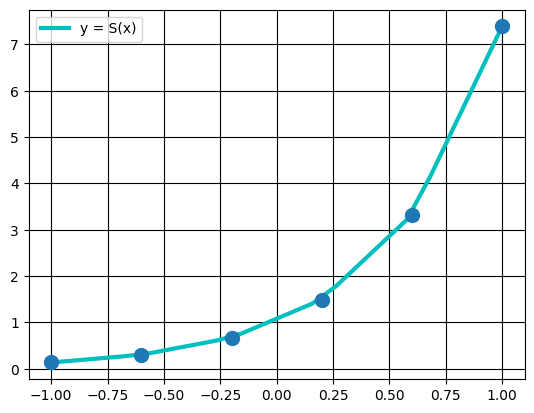

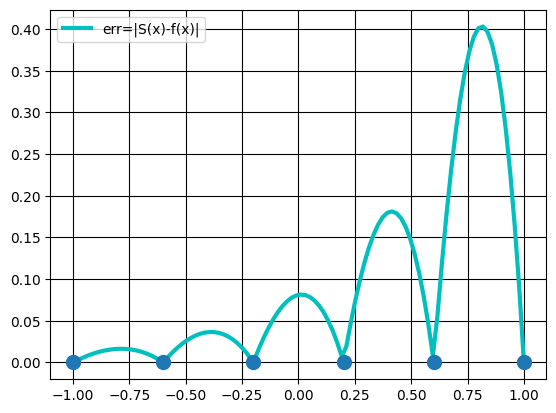

In [ ]:
### Interpolarea spline liniara
# Ex1 din Lab8

import numpy as np
import matplotlib.pyplot as plt

#a)
def SplineLiniar(f, a, b, n, x):
  A = np.zeros(n)
  B = np.zeros(n)
  X = np.linspace(a, b, n+1)
  Y = f(X)
  y = np.zeros_like(x)
  for i in range(len(x)):
      for j in range(0, n):
        if x[i] >= X[j] and x[i] <= X[j+1]:
          A[j] = Y[j]
          B[j] = (Y[j+1] - Y[j]) / (X[j+1] - X[j])
          y[i] = A[j] + B[j]*(x[i] - X[j])
          #print(f"i, j = {i, j}| x{i} = {x[i]:.4f}| y{i} = {y[i]:.5e}")
          break
  return y

#%%b)
f = lambda x: np.exp(2*x)
n = 5
a = -1
b = 1
X = np.linspace(a, b, n+1)
Y = f(X)
#S = SplineLiniar(f, a, b, n, x)
#print(S)

#%% afisam functia spline liniara
fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(a, b, 20)
S_graf = SplineLiniar(f, a, b, n, x_graf)
ax.plot(x_graf, S_graf, linestyle='-', lw=3, color='c', label='y = S(x)')  #y = S[j](x) = a[j] + b[j]*(x − X[j])
ax.grid(True, color='k')
ax.plot(X, Y, linestyle='None', marker='o', markersize=10)
ax.legend(loc='best')

#%% afisam eroarea
fig = plt.figure()
ax = plt.axes()
x_graf = np.linspace(a, b, 100)
S_graf = SplineLiniar(f, a, b, n, x_graf)
ax.plot(x_graf, np.abs(S_graf - f(x_graf)), linestyle='-', lw=3,color='c' ,label='err=|S(x)-f(x)|')
ax.grid(True, color='k')
ax.plot(X, np.zeros_like(X), linestyle='None', marker='o', markersize=10)
ax.legend(loc='best')


Pentru h = 10^-0:
-----------------------------------------------------------------------
Aproximare diferențe finite ascendente: 6.38905609893065, Eroare: 4.38905609893065
Aproximare diferențe finite descendente: 0.8646647167633873, Eroare: 1.1353352832366128
Aproximare diferențe finite centrale: 3.626860407847019, Eroare: 1.626860407847019

Pentru h = 10^-1:
-----------------------------------------------------------------------
Aproximare diferențe finite ascendente: 2.2140275816016985, Eroare: 0.21402758160169855
Aproximare diferențe finite descendente: 1.8126924692201818, Eroare: 0.1873075307798182
Aproximare diferențe finite centrale: 2.01336002541094, Eroare: 0.013360025410940057

Pentru h = 10^-2:
-----------------------------------------------------------------------
Aproximare diferențe finite ascendente: 2.0201340026755776, Eroare: 0.020134002675577634
Aproximare diferențe finite descendente: 1.9801326693244747, Eroare: 0.019867330675525263
Aproximare diferențe finite centra

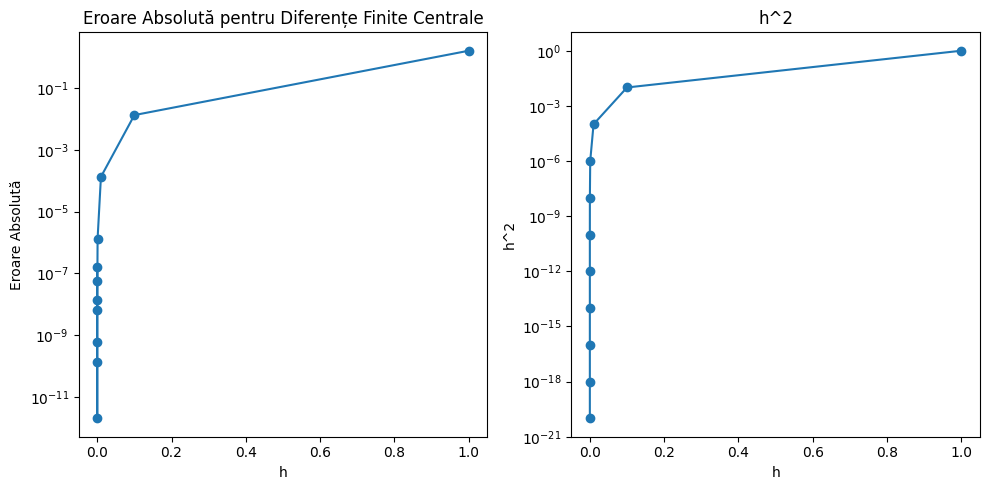

In [ ]:
### Derivarea numerica. Diferente finite ascendente, descendente si centrale -
# Ex1 din Lab9
import numpy as np
import matplotlib.pyplot as plt

def FDM(f, df, x, h):
  aprox = np.zeros(3)
  err = np.zeros(3)
  aprox[0] = (f(x+h) - f(x))/h   # ascendente
  err[0] = np.abs(aprox[0] -df(x))
  aprox[1] = (f(x) - f(x-h))/h   # descendente
  err[1] = np.abs(aprox[1] - df(x))
  aprox[2] = (f(x+h) - f(x-h))/(2*h)   # centrale
  err[2] = np.abs(aprox[2] - df(x))
  return aprox, err

f = lambda x: np.exp(2*x)
df = lambda x: 2*np.exp(2*x)
x = 0

# Valorile pentru h = 10^-k, k = 1 până la 10
approximations = []
errors = []
h_val = []
h2_val = []

for k in range(11):
    h = 10**(-k)
    approx, err = FDM(f, df, x, h)
    approximations.append(approx)
    errors.append(err)
    h_val.append(h)
    h_2 = h**2
    h2_val.append(h_2)
    print(f"Pentru h = 10^-{k}:")
    print(f"Aproximare diferențe finite ascendente: {approx[0]}, Eroare: {err[0]}")
    print(f"Aproximare diferențe finite descendente: {approx[1]}, Eroare: {err[1]}")
    print(f"Aproximare diferențe finite centrale: {approx[2]}, Eroare: {err[2]}\n")



# Graficul erorilor absolute și al funcției h^2
errors_central = np.array(errors)[:, 2]  # Erorile pentru diferențe finite centrale

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(h_val, errors_central, marker='o')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Eroare Absolută')
plt.title('Eroare Absolută pentru Diferențe Finite Centrale')

plt.subplot(1, 2, 2)
plt.plot(h_val, h2_val, marker='o')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('h^2')
plt.title('h^2')

plt.tight_layout()
plt.show()

aria dreptunghiului = 0.7788007830714049
aria trapezului =  0.6839397205857212
aria Simpson =  0.7471804289095104
aria Newton =  0.7469923196130519


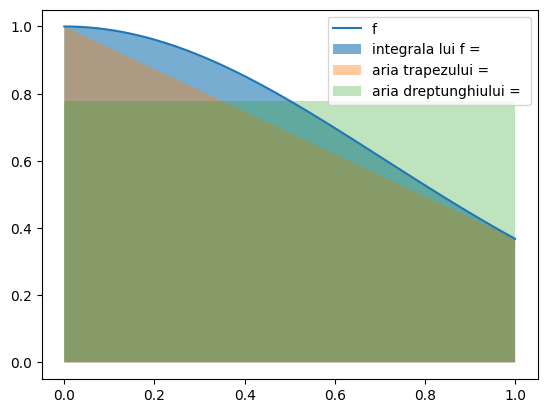

In [ ]:
+### Metoda trapezului, Simpson, Newton
# Ex1 din Lab10


import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

#%% Ex 1a) scriem funcțiile var 1

def dreptunghi(f,a,b):
    return f((a+b)/2)*(b-a)  # cuadratura dreptunghiului

def trapez(f,a,b):
    return (f(a)+f(b))*(b-a)/2   # cuadratura trapezului

def Simpson(f, a, b):
    return (f(a) + 4*f((a+b)/2) + f(b)) * (b-a)/6   # cuadratura Cavalieri-Simpson

def Newton(f, a, b):
    return (f(a) + 3*f((a+2*b)/3) + 3*f((2*a+b)/3) + f(b)) * (b-a)/8  # cuadratura Newton

#%% Var 2
'''
def CuadraturiNC(f, a, b, n):
    if n == 0:
        I = f((a+b)/2)*(b-a)   # cuadratura dreptunghiului
    elif n == 1:
        I = (f(a)+f(b))*(b-a)/2   # cuadratura trapezului
    elif n == 2:
        I = (f(a) + 4*f((a+b)/2) + f(b))*(b-a)/6   # cuadratura Cavalieri-Simpson
    elif n == 3:
        I = (f(a) + 3*f((a+2*b)/3) + 3*f((2*a+b)/3) + f(b))*(b-a)/8  # cuadratura Newton
    return I
'''
#%% Ex 1b) apelăm funcțiile

f = lambda x : np.exp(-x**2)
a = 0
b = 1
print('aria dreptunghiului =',dreptunghi(f, a, b))
print('aria trapezului = ', trapez(f, a, b))
print('aria Simpson = ', Simpson(f, a, b))
print('aria Newton = ', Newton(f, a, b))

#%% apelăm pt var 2
'''
f = lambda x : np.exp(-x**2)
a = 0
b = 1
#b = 10
for n in range(4):
    I = CuadraturiNC(f, a, b, n)
    print('pt n =', n, ' ', I, '\n')
'''
#%% vrem să afișăm graficele ariilor

x = np.linspace(a, b, 100)   #discretizarea
plt.figure()
plt.plot(x, f(x), label = 'f')

# fill_between(vector de abscise, vector de ordonate, alpha = transparența culorii)

plt.fill_between(x, f(x), alpha = 0.6, label = 'integrala lui f = ')
plt.fill_between([a, b], [f(a), f(b)], alpha = 0.4, label = 'aria trapezului = ')
plt.fill_between([a, b], [f((a-b)/2), f((a+b)/2)],alpha = 0.3, label = 'aria dreptunghiului = ')

plt.legend()


In [ ]:
### Metoda dreptunghiului sumata, trapezului sumata si Simpson sumata
# Ex2 din Lab10

import matplotlib.pyplot as plt
import numpy as np

def CuadraturiNC(f, a, b, n):
    if n == 0:
        I = f((a+b)/2)*(b-a)   # cuadratura dreptunghiului
    elif n == 1:
        I = (f(a)+f(b))*(b-a)/2   # cuadratura trapezului
    elif n == 2:
        I = (f(a) + 4*f((a+b)/2) + f(b))*(b-a)/6   # cuadratura Cavalieri-Simpson
    elif n == 3:
        I = (f(a) + 3*f((a+2*b)/3) + 3*f((2*a+b)/3) + f(b))*(b-a)/8  # cuadratura Newton
    return I

def CuadraturiNCsum(f, a, b, n, m):
    x = np.linspace(a, b, m + 1)
    I = 0
    for k in range(m):
        I += CuadraturiNC(f, x[k], x[k+1], n)
    return I

#%% Exc 2b)

f = lambda x : np.exp(-x**2)
a = 0
b = 1
n = 5

for n in range(4):
    I = CuadraturiNCsum(f, a, b, n, m = 5)
    print('NC sum pt n =', n, ' ', I, '\n')

NC sum pt n = 0   0.7480532524998317 

NC sum pt n = 1   0.744368339763667 

NC sum pt n = 2   0.7468249482544435 

NC sum pt n = 3   0.7468244953350052 



In [ ]:
### Metoda coeficientilor nedeterminati si metoda de cuadratura Gauss (n = 1)
# Ex1 din Lab11

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def CaudMetCoefNedet(f, a, b, n):
  x = np.linspace(a, b, n+1)
  A = np.zeros((n+1, n+1))
  c = np.zeros_like(x)
  #W = np.zeros_like(x)
  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = x[j]**i
      c[i] = (b**(i+1) - a**(i+1)) / (i+1)
  W = np.linalg.solve(A, c)
  In = 0
  for k in range(n+1):
    In = In + W[k] * f(x[k])
  return In   #integrala exacta

f = lambda x: np.exp(2*x)
n = 10
a = 0
b = 1

In_sol = CaudMetCoefNedet(f, a, b, n)
print(In_sol)

X = sp.Symbol('X')
F = lambda X: sp.exp(2*X)
I_exact = sp.integrate(F(X), (X, a, b))
print(I_exact.evalf())
err = np.abs(In_sol - I_exact.evalf())
print(err)

#%% formula de cuadratura GAUSS
#b) pt cazul n=1
def CuadGauss1(f, a, b):
  x0 = sp.Symbol('x0', negative = True)
  x1 = sp.Symbol('x1', positive = True)
  W0 = sp.Symbol('W0')
  W1 = sp.Symbol('W1')
  x = sp.Symbol('x')
  sol = sp.solve([W0 + W1 - sp.integrate(1, (x, -1, 1)),
                  W0*x0 + W1*x1 - sp.integrate(x, (x, -1, 1)),
                  W0*x0**2 + W1*x1**2 - sp.integrate(x**2, (x, -1, 1)),
                  W0*x0**3 + W1*x1**3 - sp.integrate(x**3, (x, -1, 1))], [W0, W1, x0, x1])
  print(sol)
  w0 = sol[0][0]
  w1 = sol[0][1]
  csi0 = sol[0][2]
  csi1 = sol[0][3]
  I = w0 * f((b-a)/2 * csi0 + (b+a)/2)*(b-a)/2 + w1 * f((b-a)/2 * csi1 + (b+a)/2)*(b-a)/2
  return I

f = lambda x: sp.exp(-x**2)
a = 0
b = 1
I_gauss1 = CuadGauss1(f, a, b).evalf()
print(I_gauss1)

X = sp.Symbol('X')
F = lambda X: sp.exp(2*X)
I_exact = sp.integrate(F(X), (X, a, b))

err = np.abs(I_gauss1 - I_exact.evalf())
print(err)

3.194528049469989
3.19452804946533
4.66382488184536e-12
[(1, 1, -sqrt(3)/3, sqrt(3)/3)]
0.746594688282860
2.44793336118247


0.999999999999999*x**2 - 2.0*x + 3.0


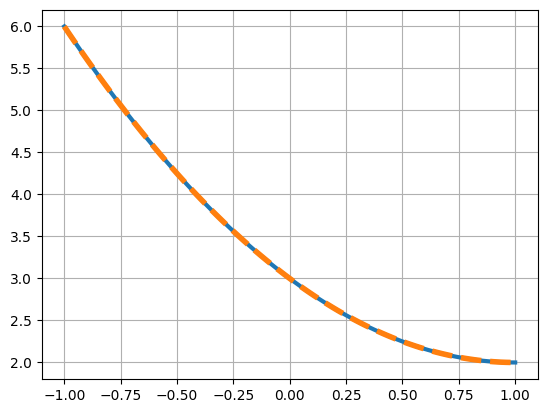

In [2]:
### Metoda celor mai mici patrate
# Ex1 b) , c) din Lab 12
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


f = lambda x: x**2 - 2*x + 3
a = -1
b = 1
n = 2
w = lambda x: 1

def AproximareL2(f, a, b, w, n):
  B = np.zeros(n+1)
  M = np.zeros((n+1, n+1))
  x = sp.Symbol('x')
  for k in range(n+1):
    B[k] = sp.integrate(w(x)*f(x)*x**k, (x, a, b)).evalf()
    for j in range(n+1):
      M[k, j] = sp.integrate(w(x)*x**(k+j), (x, a, b)).evalf()
  C = np.linalg.solve(M, B)
  pn = 0
  for i in range(n+1):
    pn = pn + C[i]*x**i
  return pn

pn = AproximareL2(f, a, b, w, n)
print(pn)
x = sp.Symbol('x')

pn_func = sp.lambdify(x, pn, 'numpy')
f_fun = sp.lambdify(x, f(x), 'numpy')

fig = plt.figure(1)
ax = plt.axes()
ax.grid(True)
x_graf = np.linspace(a, b, 100)
pn_graf = pn_func(x_graf)
y_graf = f_fun(x_graf)
ax.plot(x_graf, pn_graf, linestyle = '-', lw = 3, label = 'pn(x)')
ax.plot(x_graf, y_graf, linestyle = '--', lw = 4, label = 'f(x)')
'''
fig = plt.figure(2)
ax2 = plt.axes()
ax2.grid(True)
ax2.plot(x_graf, np.abs(y_graf - pn_graf), linestyle = '-', lw = 4, label = 'f(x)')
'''

# Calcularea erorii absolute a aproximării
error = np.abs(y_graf - pn_graf)
'''
# Afișarea graficului pentru eroarea absolută
fig2 = plt.figure(2)
ax2 = plt.axes()
ax2.grid(True)
ax2.plot(x_graf, error, linestyle='-', lw=4, label='Eroare absolută')
ax2.set_title('Eroarea absolută a aproximării')
ax2.legend()
'''
plt.show()
